<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

1. ~The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook.~ 
2. ~Normalize the data (all features should have roughly the same scale)~
3. ~Import the type of model and layers that you will need from Keras.~
4. ~Instantiate a model object and use `model.add()` to add layers to your model~
5. ~Since this is a regression model you will have a single output node in the final layer.~
6. ~Use activation functions that are appropriate for this task~
7. ~Compile your model~
8. ~Fit your model and report its accuracy in terms of Mean Squared Error~
9. ~Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.~
0. ~Run this same data through a linear regression model. Which achieves higher accuracy?~
1. Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
2. After feature engineering, which model sees a greater accuracy boost due to the new features?

## Step 1

Load the Boston Housing dataset

In [1]:
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [2]:
x_train.shape

(404, 13)

## Step 2

Normalize the data

In [3]:
from tensorflow.keras.utils import normalize
x_train_n = normalize(x_train, axis=1, order=2)
x_test_n = normalize(x_test, axis=1, order=2)

## Step 3

Import the model and layers you will need from Keras

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Step 4, 5, & 6

Instantiate a model and add layers to it, with a single output node; make good choices for the activation functions

In [5]:
model = Sequential()
model.add(Dense(5, input_dim=13, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

W0122 14:53:43.968533 4609500608 deprecation.py:506] From /Users/chris/opt/anaconda3/envs/u4s2nlp/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Step 7

Compile your model

In [6]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

## Step 8

Fit your model & report its accuracy

In [7]:
hist = model.fit(x_train_n, y_train, epochs=100, verbose=False)
model.evaluate(x_test_n, y_test)

102/102 [==============================] - 0s 348us/sample - loss: 79.8284


79.82844663133808

## Step 9

Plot loss/accuracy over epochs

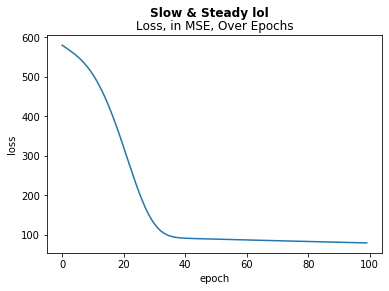

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.suptitle('Slow & Steady lol', fontweight='bold')
plt.title('Loss, in MSE, Over Epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Step 10

Build a basic linear regression model & report its accuracy

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model2 = LinearRegression()
model.fit(x_train_n, y_train)
mean_squared_error(y_test, model.predict(x_test_n))

404/404 [==============================] - 0s 59us/sample - loss: 79.1087


79.611994216071

## Step 11

Now with feature engineering

In [29]:
import pandas as pd
columns = ['crime_rate', 'big_houses', 'non_retail', 'riverfront',
           'nitric_oxide', 'rooms', 'old_houses', 'employ_dist',
           'hiway_access', 'tax_rate', 'class_size', 'racism', 'poor_people']
df_raw = pd.DataFrame(x_train, columns=columns)
df_raw['crime_rate'].describe()

count    404.000000
mean       3.745111
std        9.240734
min        0.006320
25%        0.081437
50%        0.268880
75%        3.674808
max       88.976200
Name: crime_rate, dtype: float64

In [30]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df = pd.DataFrame(scale.fit_transform(df_raw.values), columns=df_raw.columns)
df['crime_rate'].describe()

count    404.000000
mean       0.042023
std        0.103864
min        0.000000
25%        0.000844
50%        0.002951
75%        0.041233
max        1.000000
Name: crime_rate, dtype: float64

In [35]:
df['medv'] = y_train
df.head()

,crime_rate,big_houses,non_retail,riverfront,nitric_oxide,rooms,old_houses,employ_dist,hiway_access,tax_rate,class_size,racism,poor_people,medv
0,0.013782,0.000,0.281525,0.0,0.314815,0.499806,0.914521,0.297191,0.130435,0.227533,0.893617,1.000000,0.468819,15.2
1,0.000174,0.825,0.057551,0.0,0.061728,0.784082,0.131823,0.536537,0.043478,0.305927,0.223404,0.996167,0.038079,42.3
2,0.054984,0.000,0.646628,0.0,0.506173,0.272851,1.000000,0.021178,1.000000,0.913958,0.808511,0.946089,0.042219,50.0
3,0.000374,0.000,0.173387,0.0,0.267490,0.479473,0.325438,0.506821,0.173913,0.068834,0.808511,1.000000,0.173289,21.1
4,0.041439,0.000,0.646628,0.0,0.674897,0.545120,0.880536,0.150041,1.000000,0.913958,0.808511,0.986207,0.356512,17.7


In [43]:
import seaborn as sns
from itertools import combinations
import numpy as np
combos = list(combinations(df.columns.drop('medv'), 2))
pal = sns.color_palette('RdBu_r', 11)
bins = 
for co in combos:
    sns.scatterplot(x=co[0], y=co[1], hue='medv', data=df, palette=pal)
    plt.show()

ValueError: The palette list has the wrong number of colors.

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [11]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.